In [171]:
import pickle
import numpy as np

# digits = load_digits(n_class=9)
with open('/home/sss/BRG-AD/log/test/results.pkl', 'rb') as f:
    outputs = pickle.load(f)


In [172]:
X = [output for idx, label, output in outputs]
Y = [label for idx, label, output in outputs]

X, Y = np.array(X), np.array(Y)
print(X.shape, Y.shape)

(30, 160) (30,)


In [173]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


In [174]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

In [175]:

embeddings = {
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
}

In [176]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, Y)
    timing[name] = time() - start_time

Computing t-SNE embeedding...


/home/sss/anaconda3/envs/brg-ad/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


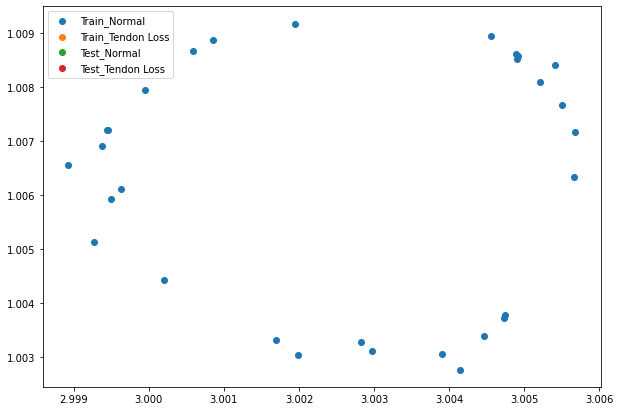

In [177]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating figure
fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")


for i in range(5):
    plt.scatter(projections[name][Y==i, 0], projections[name][Y==i, 1])

# plt.scatter(projections[name][:101, 0], projections[name][:101, 1])
# plt.scatter(projections[name][101:101+72, 0], projections[name][101:101+72, 1])
# plt.scatter(projections[name][101+72:101+72+54, 0], projections[name][101+72:101+72+54, 1])
# plt.scatter(projections[name][101+72+54:101+72+54+34, 0], projections[name][101+72+54:101+72+54+34, 1])

plt.legend(['Train_Normal', 'Train_Tendon Loss', 'Test_Normal', 'Test_Tendon Loss']) # , 'drift', 'weak_noise', 'strong_noise', 'over_loading'])

# ax.scatter3D(projection_normal[:, 0], projection_normal[:, 1], projection_normal[:, 2])
# ax.scatter3D(projection_anomaly[:, 0], projection_anomaly[:, 1], projection_anomaly[:, 2])